<a href="https://colab.research.google.com/github/Icasso/Stock-Price-Prediction/blob/main/Long_Short_Term_Memory_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [653]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past N day stock price.

In [654]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [655]:
stock = 'AAPL'
trainLength = 120
initStart = '2012-01-01'
yesterday = '2020-12-23'
predictDay = '2020-12-24'

In [656]:
#Get the stock quote 
df = web.DataReader(stock, data_source='yahoo', start = initStart, end = yesterday) 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-17,129.580002,128.039993,128.899994,128.699997,94359800.0,128.699997
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996


In [657]:
df.shape

(2260, 6)

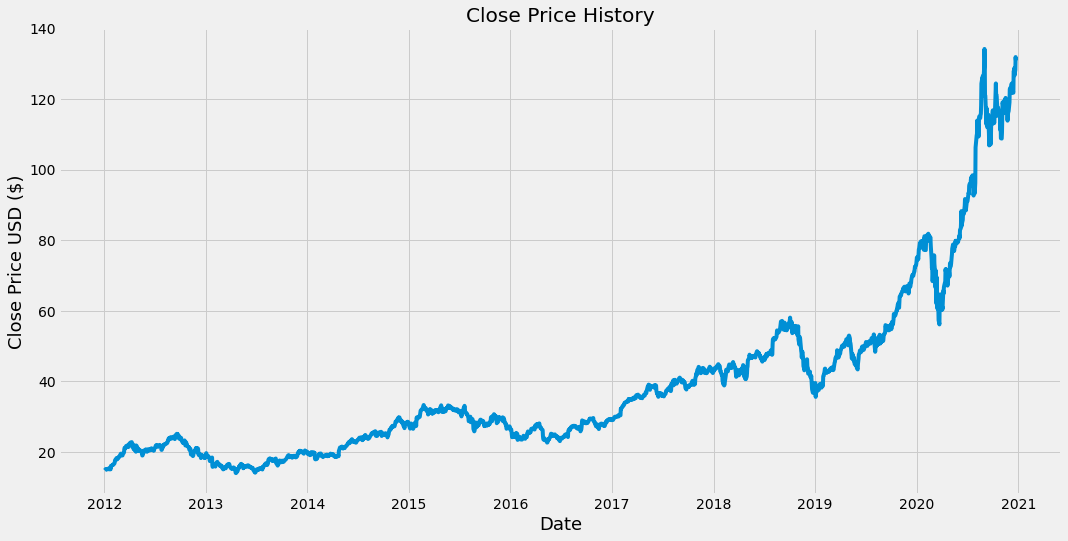

In [658]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [659]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [660]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [661]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(trainLength,len(train_data)):
    x_train.append(train_data[i-trainLength:i,0])
    y_train.append(train_data[i,0])

In [662]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [663]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [664]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [665]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [666]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1688/1688 [==============================] - 73s 42ms/step - loss: 6.6666e-04


In [667]:
#Test data set
test_data = scaled_data[training_data_len - trainLength: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(trainLength,len(test_data)):
    x_test.append(test_data[i-trainLength:i,0])

In [668]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [669]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [670]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [671]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.7777076322419654

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


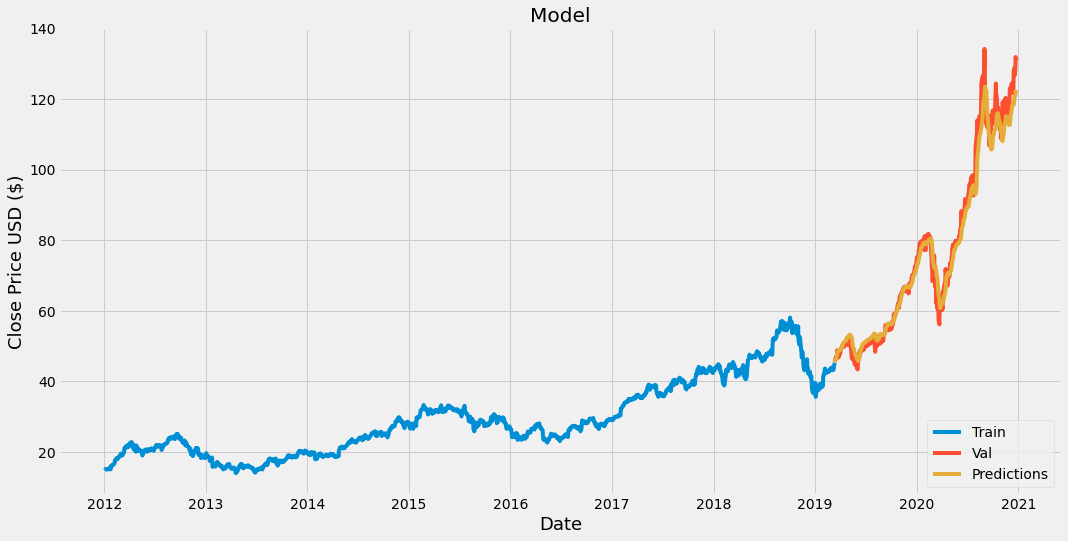

In [672]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [673]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-13,45.427502,45.419868
2019-03-14,45.932499,45.709412
2019-03-15,46.529999,46.059200
2019-03-18,47.005001,46.469707
2019-03-19,46.632500,46.920132
...,...,...
2020-12-17,128.699997,119.633781
2020-12-18,126.660004,120.503395
2020-12-21,128.229996,121.079918


In [674]:
#Get the quote
quote = web.DataReader(stock, data_source='yahoo', start = initStart, end = yesterday)
#Create a new dataframe
new_df = quote.filter(['Close'])
#Get the last N day closing price 
last_N_days = new_df[-trainLength:].values
#Scale the data to be values between 0 and 1
last_N_days_scaled = scaler.transform(last_N_days)
#Create an empty list
X_test = []
#Append teh past N days
X_test.append(last_N_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[123.35993]]


In [675]:
#Get the quote
quote2 = web.DataReader(stock, data_source='yahoo', start = predictDay, end = predictDay)
print(quote2['Close'])

Date
2020-12-24    131.970001
2020-12-24    131.970001
Name: Close, dtype: float64
